# Data visualization and Exploratory Data Analysis (EDA)

In this notebook we'll go over the basics when it comes to data analysis. After getting your data (see the previous
notebook for an example on how to do that), you are encouraged to explore the dataset for any interesting phenomena.

This process is called Exploratory Data Analysis (EDA) and comprises a lot of different techniques. All of them, in the
end, are there to provide us, the data scientists, a means to visually detect interesting behaviour in the data.

The two plots generated here are just examples, and you should figure out yourself what interesting data you want to
look at. For more information on how to create neat plots, see [this](https://seaborn.pydata.org/introduction.html) link.

### Loading data

In [59]:
import pandas as pd

pd.set_option('display.max_columns', None)

data = pd.read_csv(r"../data/owid-covid-data.csv")
data = data.sort_values('date', ascending=True)
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

## Scatter plot
Scatter plots are a good start when you are trying to see if there is some kind of structure to your data. For example,
your data might be clustered in certain regions or, like in this example, show a trend over time. In the case of the
latter you could follow it up with a simple line graph (maybe with also averaging the data points per day to reduce
visual clutter).

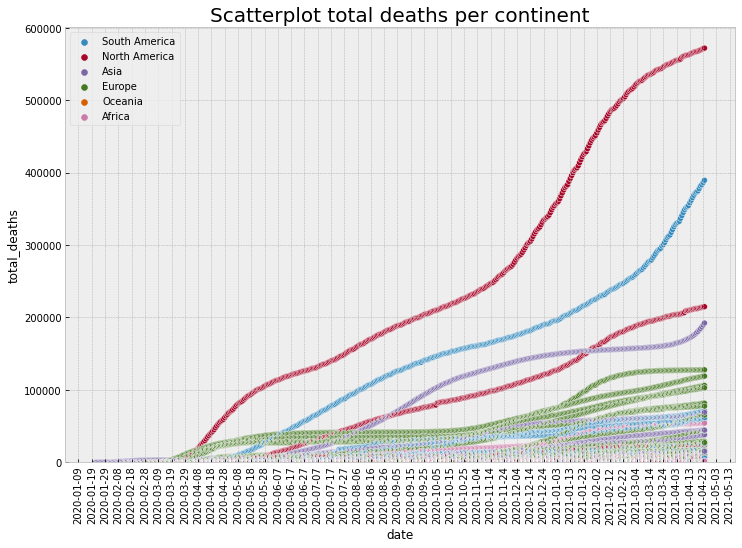

In [60]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as ticker

plt.style.use('bmh') # Set the style from a preset of styles

fig = plt.subplots(figsize=(12, 8)) # Create figure and set size

ax = sb.scatterplot(data=data, x='date', y='total_deaths', hue='continent') # Create a scatter plot total deaths by date per continent
ax.set_title('Scatterplot total deaths per continent', size=20) # Set title
ax.set_ylim(ymin=0) # Set starting value of y-axis to 0 - there are no negative deaths
ax.xaxis.set_major_locator(ticker.MultipleLocator(10)) # Set density of x-axis tickers

plt.legend(loc='upper left') # Show legend on the upper left size
plt.setp(ax.get_xticklabels(), rotation=90) # Rotate x-axis tickers 90degrees so that they are readible
print() # removes weird array output filled with 'None's

There's far too many countries to visualize them in a scatter plot clearly. To increase the likelihood of interesting
findings and also data interpretability you might want to reduce the search space to a specific continent or even a
specific country.

In the following code segment we reduce the search to Europe, for no particular reason other than it being the place we
live.

For more information on using EDA using Pandas, see [this](https://towardsdatascience.com/exploratory-data-analysis-eda-visualization-using-pandas-ca5a04271607)
link.

In [61]:
# Creating a new dataframe with the rows that correspond to European countries by selecting the continent

# To be able to do this, some indexing is necessary. So save the data with index_col='continent' so that Europe can be used by .loc() method
data_indexed = pd.read_csv(r"../data/owid-covid-data.csv", index_col='continent')

data_europe = data_indexed.loc['Europe']

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Europe,VAT,Vatican,2021-04-20,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-21,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-22,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-23,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
Europe,VAT,Vatican,2021-04-24,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN


This data can then be used, just like before, to only plot information for this continent, which is what we will do in
the next section.

## Bar plot
Another example of an interesting plot is the bar plot. In the following segment we are looking at a breakdown of the
number of tests performed per European country.

Some preprocessing, in particular the removal of empty rows, is done before plotting.

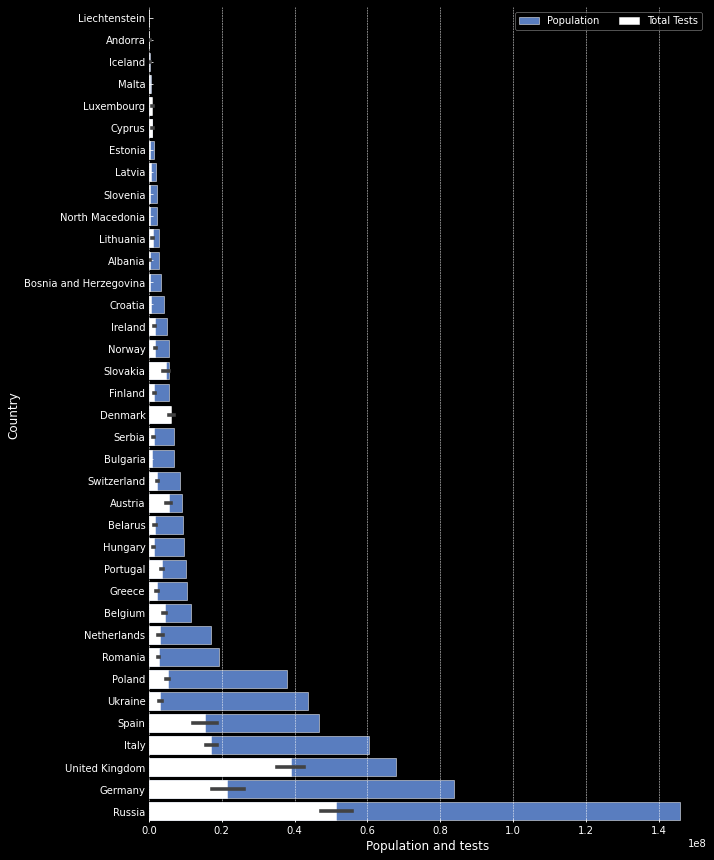

In [62]:
%matplotlib inline

data_europe = data_europe.sort_values('population', ascending=True)

# Remove NAN values in the dataframe
data_europe = data_europe[data_europe['population'].notna()]
data_europe = data_europe[data_europe['total_tests'].notna()]

with plt.style.context('dark_background'):

    f, ax = plt.subplots(figsize = (10,15))

    sb.barplot(x = 'population', y = 'location', data = data_europe,
                label = 'Population', color = 'b', edgecolor = 'w')

    sb.set_color_codes('muted')

    sb.barplot(x = 'total_tests', y = 'location', data = data_europe,
                label = 'Total Tests', color = 'white', edgecolor = 'w')

    ax.legend(ncol = 2, loc = 'upper right')
    ax.set(xlabel='Population and tests', ylabel='Country')
    sb.despine(left = True, bottom = True)
    plt.show()

As expected, countries with higher population counts tested more. What is even more interesting is that Germany tested
roughly the same amount of people as Spain even though its population is double the amount of Spain's. The same phenomena
is observed for Russia - having tested the same amount roughly as the United Kingdom but having more than twice their
population.

## Conclusion
By looking at these and other possible graphs you can try to find interesting tidbits of info, hidden in the data. Then,
you can test theories you've created based on said data and try to make statements about the processes that underlie the
data.

For more info on that, see our third example notebook.